In [1]:
import numpy as np
import util
import pickle
import sklearn.linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
trainfile = 'data/train.csv'
header, ids, X, Y = util.fetch_data(trainfile)

seed=229
np.random.seed(seed)

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Training

In [ ]:
logreg_model = sklearn.linear_model.LogisticRegression()
logreg_model.fit(X, Y)

In [ ]:
logreg_out = open('models/logreg.pickle', 'wb')
pickle.dump(logreg_model, logreg_out)
logreg_out.close()

# Evaluation

In [3]:
logreg_model = pickle.load(open('models/logreg.pickle'))
print(logreg_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [4]:
trainsizes, traingini, testgini = util.learning_curves(logreg_model, X_train, X_test, y_train, y_test,
                                                      scorer=util.gini_proba_scorer)
print(traingini)
print('')
print(testgini)

Evaluating model on training set size 23808
Evaluating model on training set size 47616
Evaluating model on training set size 71425
Evaluating model on training set size 95233
Evaluating model on training set size 119042
Evaluating model on training set size 142850
Evaluating model on training set size 166659
Evaluating model on training set size 190467
Evaluating model on training set size 214276
Evaluating model on training set size 238084
Evaluating model on training set size 261892
Evaluating model on training set size 285701
Evaluating model on training set size 309509
Evaluating model on training set size 333318
Evaluating model on training set size 357126
Evaluating model on training set size 380935
Evaluating model on training set size 404743
Evaluating model on training set size 428552
Evaluating model on training set size 452360
Evaluating model on training set size 476169
[0.24223431268358889, 0.25155774377360646, 0.23973675095350075, 0.23736482303787382, 0.24180071178242707

In [5]:
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('Logistic Regression')
plt.legend()
plt.savefig('figures/learning_curves/logisticregression.eps', format='eps', dpi=1000)

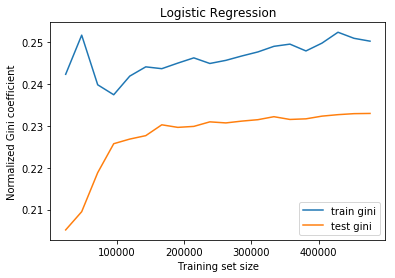

In [6]:
plt.show()

# Output

In [ ]:
logreg_model.fit(X, Y)
print(util.gini_proba_scorer(logreg_model, X, Y))

In [ ]:
util.make_prediction(logreg_model, 'data/test.csv', 'predictions/logreg.csv',
                     predict_method=util.proba_method(logreg_model))